## Processamento morfológico de Imagens

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

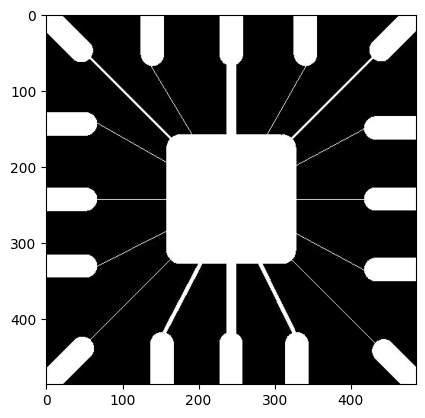

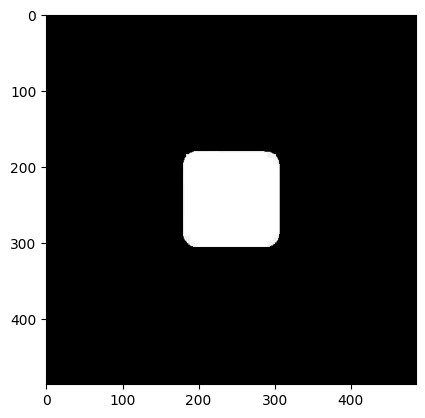

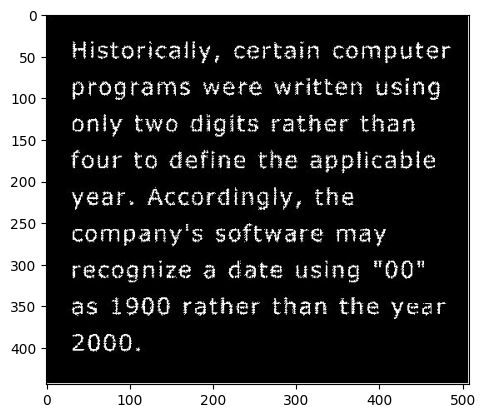

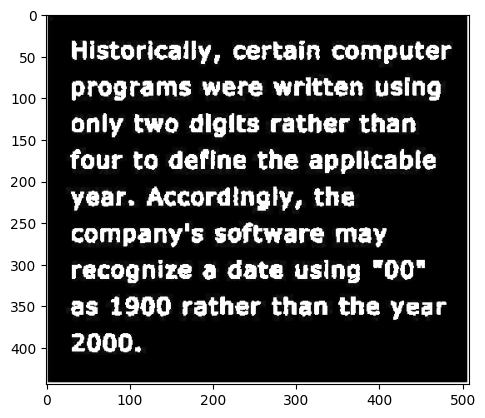

In [28]:
img = cv2.imread("../Downloads/foto_binaria/foto_bin.tif", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.show()

img = img / np.max(img) # 0 - preto, 1 - branco

EE = np.ones((45, 45))

padded_img = cv2.copyMakeBorder(img, 22, 22, 22, 22, cv2.BORDER_CONSTANT, value = 0) # por que tenho que mudar aqui para a metade do tamanho do EE?

eroded = cv2.erode(img, EE, iterations=1)

plt.imshow(eroded, cmap="gray")
plt.show()

img = cv2.imread("../Downloads/texto_quebrado.tif", cv2.IMREAD_GRAYSCALE)


img = img / np.max(img) # 0 - preto, 1 - branco

EE = np.ones((3, 3))

padded_img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value = 0) # por que tenho que mudar aqui para a metade do tamanho do EE?

dilated = cv2.dilate(img, EE, iterations=1)
plt.imshow(img, cmap="gray")
plt.show()
plt.imshow(dilated, cmap="gray")
plt.show()

In [29]:
img = cv2.imread("../Downloads/foto_binaria/foto_bin.tif", cv2.IMREAD_GRAYSCALE)

img = img / np.max(img)

def erosao(img, EE):

    x,y = img.shape
    EE_x, EE_y = EE.shape
    EE_x_metade = EE_x//2
    EE_y_metade = EE_y//2
    
    img_c_padding = np.zeros((x + EE_x, y + EE_y))
    img_c_padding[EE_x_metade : x + EE_x_metade, EE_y_metade : y + EE_y_metade] = img

    out = np.zeros_like(img)

    
    # if img_c_padding[EE_metade_x : (x + EE_metade_x), EE_metade_y : (y + EE_metade_y)] == 1:
    #     img_c_padding[ # Tem q terminar aqui
    
    for i in range(EE_x_metade, x + EE_x_metade):
        for i in range(EE_y_metade, y + EE_y_metade):
            if img_c_padding[i,j] == 1:
                patch = img_c_padding[i-EE_x_metade : i + EE_x_metade+1, j-EE_y_metade: j+EE_y_metade+1]
                out[i-EE_x_metade, j-EE_y_metade] = np.min(patch * EE)
    return out.astype(np.uint8)

def dilatacao(img, EE):

    x,y = img.shape
    EE_x, EE_y = EE.shape
    EE_x_metade = EE_x//2
    EE_y_metade = EE_y//2
    
    img_c_padding = np.zeros((x + EE_x, y + EE_y)) # talvez aqui seja 1?
    img_c_padding[EE_x_metade : x + EE_x_metade, EE_y_metade : y + EE_y_metade] = img

    out = np.zeros_like(img)

    
    # if img_c_padding[EE_metade_x : (x + EE_metade_x), EE_metade_y : (y + EE_metade_y)] == 1:
    #     img_c_padding[ # Tem q terminar aqui
    
    for i in range(EE_x_metade, x + EE_x_metade):
        for i in range(EE_y_metade, y + EE_y_metade):
            if img_c_padding[i,j] == 0:
                patch = img_c_padding[i-EE_x_metade : i + EE_x_metade+1, j-EE_y_metade: j+EE_y_metade+1]
                out[i-EE_x_metade, j-EE_y_metade] = np.min(patch * EE)
    return out.astype(np.uint8)


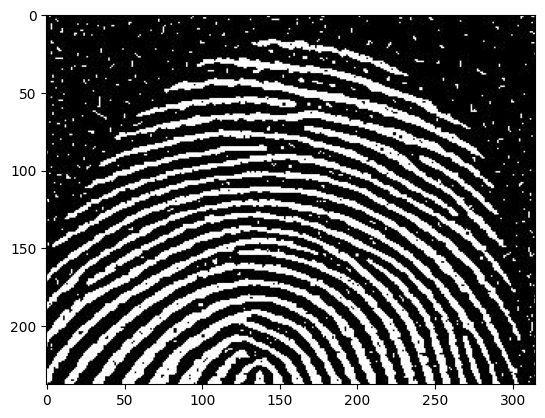

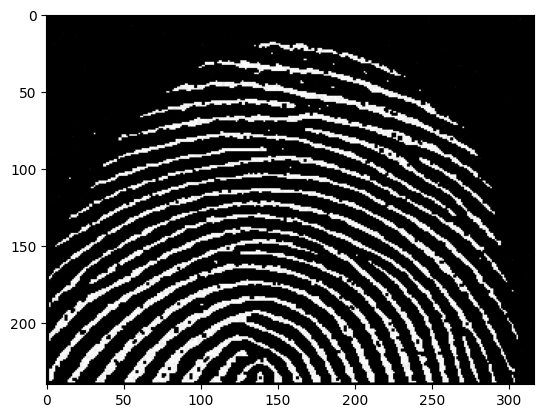

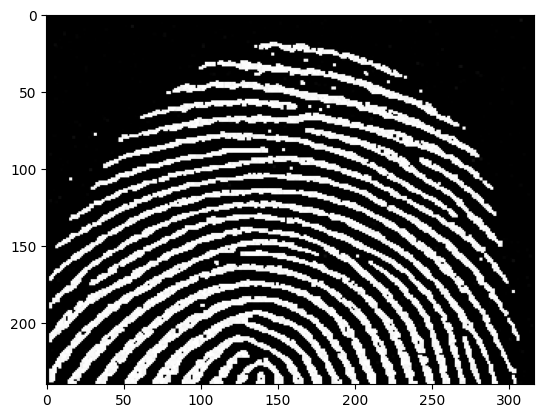

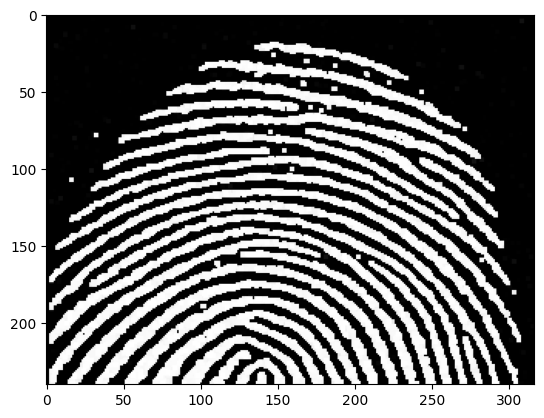

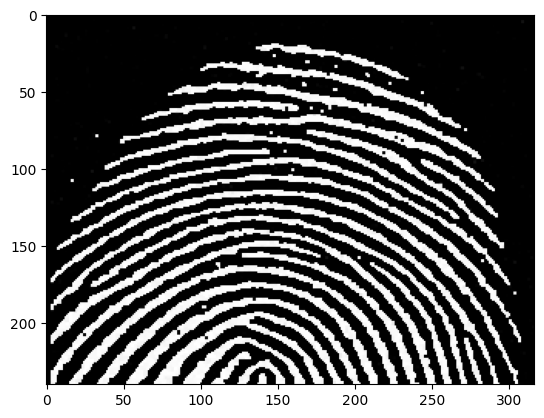

In [38]:
img = cv2.imread("../Downloads/digital.tif", cv2.IMREAD_GRAYSCALE)

img = img / np.max(img) # 0 - preto, 1 - branco

EE = np.ones((2,2))

padded_img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value = 0)

img_semi_aberta = cv2.erode(padded_img, EE, iterations=1)
img_aberta = cv2.dilate(img_semi_aberta, EE, iterations=1)
img_semi_fechada = cv2.dilate(img_aberta,EE, iterations=1)
img_fechada = cv2.erode(img_semi_fechada, EE, iterations=1)

plt.imshow(img, cmap="gray")
plt.show()
plt.imshow(img_semi_aberta, cmap="gray")
plt.show()
plt.imshow(img_aberta, cmap="gray")
plt.show()
plt.imshow(img_semi_fechada, cmap="gray")
plt.show()
plt.imshow(img_fechada, cmap="gray")
plt.show()